# Chapter 1 — Introduction to AI Computer Vision (Mechatronics Systems View)
**Course:** Special Topics in Mechatronics Engineering (AI + Computer Vision + Intelligent Controllers)  
**Instructor:** Dr. Mohammad Al Khawaldah  
**Notebook type:** Lecture + Lab (interactive)  
**Last updated:** 2026-02-16

---

## 🎯 Learning Outcomes
By the end of Chapter 1, you will be able to:

1. Explain the full **Vision→Decision→Controller** pipeline (system engineering, not model-only).
2. Define core terms precisely: **model, training, inference, dataset, labels, classes, confidence, threshold, NMS, tracking, domain shift, latency**.
3. Run a complete example application (frame → inference → decision gate → “actuator command” + evidence logging).
4. Ask the right **engineering questions** and identify common **failure modes** in industrial vision systems.

> In mechatronics, the model is only a part of the system. The rest is engineering.

---
# 1) Introduction: AI Computer Vision in Mechatronics

Computer Vision transforms raw pixels into structured understanding (objects, states, defects, motion).  
Mechatronics turns that understanding into **actions** that affect the physical world.

### Why it is different from “pure AI”
A real mechatronics vision system must satisfy:
- **Latency constraints** (real-time control, moving targets, conveyor speed)
- **Safety constraints** (false alarms create “alarm fatigue”; missed detections can cause accidents)
- **Hardware constraints** (CPU/GPU, memory, power, edge vs cloud)
- **Environmental variation** (lighting, dust, glare, camera shift) → domain shift

We do not just train models — we design **end-to-end systems**.

---
# 2) The Complete AI Vision Pipeline (End-to-End System)

Canonical pipeline in industrial mechatronics:

**Sensor → Preprocessing → Model Inference → Post-processing → Decision Logic → Controller Interface → Actuator → Logging**

You must be able to explain what happens at each step, and what can go wrong.

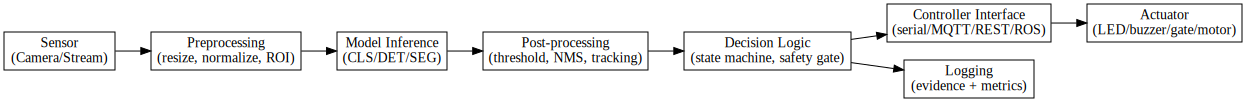

In [17]:
# =========================================================
# 2.1 Flowchart diagram (auto-generated) using Graphviz
# =========================================================
!pip -q install graphviz

from graphviz import Digraph

g = Digraph("vision_pipeline", format="png")
g.attr(rankdir="LR", fontsize="12")

g.node("S", "Sensor\n(Camera/Stream)", shape="box")
g.node("P", "Preprocessing\n(resize, normalize, ROI)", shape="box")
g.node("M", "Model Inference\n(CLS/DET/SEG)", shape="box")
g.node("PP", "Post-processing\n(threshold, NMS, tracking)", shape="box")
g.node("D", "Decision Logic\n(state machine, safety gate)", shape="box")
g.node("C", "Controller Interface\n(serial/MQTT/REST/ROS)", shape="box")
g.node("A", "Actuator\n(LED/buzzer/gate/motor)", shape="box")
g.node("L", "Logging\n(evidence + metrics)", shape="box")

g.edges([("S","P"), ("P","M"), ("M","PP"), ("PP","D"), ("D","C"), ("C","A"), ("D","L")])

g

### Engineering interpretation
- Preprocessing changes both accuracy and latency.
- Post-processing prevents duplicated boxes (NMS) and stabilizes decisions (temporal smoothing).
- Decision logic is where safety policies live (e.g., “3 consecutive frames required”).
- Logging is mandatory for audits and debugging.

---
# 3) Industrial Applications (Detailed)

## A) Truck Load Compliance Inspection
**Goal:** Detect whether a truck bed is covered/uncovered/irregular and optionally classify visible load type.

**Inputs:** fixed CCTV stream (RTSP). Sometimes a separate ANPR camera provides plate number as API.  
**Outputs:** violation/no-violation event + evidence snapshot + optional actuator (gate/buzzer).

**System steps:**
1. Detect truck/bed region (DET) → crop ROI for better accuracy.
2. Classify cover state (CLS) OR segment cover/exposed regions (SEG).
3. Temporal gate: stable violation for N frames to avoid “one-frame noise”.
4. Merge repeated detections into one event per truck using tracking ID.
5. Log timestamp, confidence, snapshot, and plate ID (fusion).

**Hard real-world conditions:**
glare, shadows, night IR, motion blur, camera shift (domain shift), multiple trucks, occlusions.

## B) PPE Safety (Helmet detection)
Detect person + helmet; alarm if person without helmet persists >2 seconds (avoid alarm spam).

## C) Conveyor Quality Inspection
Detect defects/missing parts and trigger reject actuator (air jet/robot arm). Strict latency.

## D) Drone Vision
Detect targets from moving camera. Bandwidth + motion blur constraints.

---
# 4) Definitions (Core Terms)

### Model
A model is a function **fθ(x)** mapping input image x → output y. θ are learned parameters.

### Training vs Inference
- Training: learn θ from labeled dataset by minimizing a loss.
- Inference: run trained model on new frames → predictions.

### Dataset, Labels, Classes
- Dataset: samples (images/frames) + labels.
- Label/Annotation: ground truth (class / boxes / masks).
- Class: category name (“covered”, “uncovered”, “helmet”, …).

### Confidence & Threshold
- Confidence: model score for prediction (not always calibrated probability).
- Threshold: accept prediction only if score ≥ threshold.

### NMS
Removes duplicated overlapping boxes (detection).

### Tracking
Persistent object IDs across frames; prevents multiple events per same object.

### Overfitting
Train ↑, val ↓. Model memorizes.

### Domain shift
Training distribution ≠ deployment distribution (angle/lighting/weather). #1 industrial failure.

### Latency
Capture → decision time. Must meet real-time needs.

---
# 5) Key Questions (Engineering Checklist)

### System questions
1. Edge vs cloud inference? What if network fails?
2. End-to-end latency budget? Required FPS?
3. Cost of false positives vs false negatives?
4. Tracking needed to enforce “one event per object”?
5. What evidence must be stored (snapshot + confidence + reason)?

### Data questions
1. Does dataset match deployment camera angle/lighting?
2. Is dataset balanced?
3. Are labels consistent?
4. Do we have rare critical cases (night/rain/occlusion)?

### Model questions
1. Need classification/detection/segmentation?
2. Smallest model meeting accuracy+speed?
3. Which threshold matches safety policy?

---
# 6) Failure Modes (Real-World)

### Data failures
Label noise, dataset bias (day-only), leakage, missing corner cases.

### Model failures
Overfitting, slow model (latency), poor confidence calibration.

### Deployment failures
Camera moved, dirty lens, compression artifacts, new unseen objects (domain drift).

### System logic failures
No temporal smoothing, no cooldown, no tracking, no logging.

---
# 7) Exercises (Graded)

## Exercise 1 — Threshold trade-off
Change `policy.threshold` to 0.80 and rerun. Explain what happens (FP vs FN).

## Exercise 2 — Stronger temporal gating
Set `min_consecutive` to 3. Add more frames to `frame_paths`. Observe stability.

## Exercise 3 — Evidence
Open the `evidence/` folder and inspect saved files. Why is this mandatory in compliance systems?

## Exercise 4 — Design (written)
Pick one application (truck/PPE/conveyor/drone) and write:
- pipeline blocks
- where domain shift can happen
- what you will log as evidence

---
# ✅ Chapter 1 Summary
You learned:
- AI vision is a **system**, not only a model.
- Key terms and how they connect in the pipeline.
- Engineering questions + failure modes.

👉 Next: Module 2 — Image Classification (dataset, training, evaluation, deployment).